In [44]:
import numpy as np
import pandas as pd
import glob
import os
import cmath
from decimal import *
from matplotlib import pyplot as plt
%reload_ext autoreload
%autoreload 2

In [93]:
#These will eventually be input variables 
P='P1' 
A=1
path=r'G:/My Drive/UW Research/fr-XAS October 2018/Data/1% O2/0.5 Hz'
initfile=0
finfile=2
filestr=str(P + ' '+str('%.3f'%float(A))+ ' '+"*0*.txt")
# filestr

In [95]:
%autoreload
Ampa=np.r_[1:6]
Xrayraw=False
import datain
data=[]
for n in Ampa:
    if n == 1:
        print(n)
        data=np.array(datain.getdata(P,n,path,initfile,finfile,False,Xrayraw))
        print(np.shape(data),data[2,525])
    else:
        print(n)
        data=np.concatenate((data,datain.getdata(P,n,path,initfile,finfile,False,Xrayraw)),axis=2)
        print(np.shape(data),data[2,525])
if Xrayraw==True:
    Io=data[0,:,:]
    If=data[1,:,:]
    J=data[2,:,:]
    V=data[3,:,:]
    t=data[4,:,:]
    Ir=If/Io
    dt=t[1,0]
else:
    Ir=data[0,:,:]
    J=data[1,:,:]
    V=data[2,:,:]
    t=data[3,:,:]
    dt=t[1,0]
Ns=V[:,0].size
t[-1,0]

1
(4, 252000, 1) [0.20588935]
2
(4, 252000, 2) [0.20588935 0.15928144]
3
(4, 252000, 3) [0.20588935 0.15928144 0.11842144]
4
(4, 252000, 4) [0.20588935 0.15928144 0.11842144 0.07606199]
5
(4, 252000, 5) [0.20588935 0.15928144 0.11842144 0.07606199 0.03713879]


239.99880761999998

In [104]:
Ns=V[:,0].size
t[-1,0]

239.99880761999998

In [114]:
Vfft=np.fft.fftshift(np.fft.fft(V[:,0])/(Ns/2))
Jfft=np.fft.fftshift(np.fft.fft(J[:,0])/(Ns/2))
Ifft=np.fft.fftshift(np.fft.fft(Ir[:,0])/(Ns/2))
freq=np.fft.fftshift(np.fft.fftfreq(Ns,dt))

bin1=fftbin(0.5, freq,t,"Real",0)

print(np.abs(Vfft[bin1]),np.angle(Vfft[bin1]),Vfft[bin1])
print(freq[bin1])

0.19931272134526823 -1.5654663926613661 (0.001062318646968624-0.19930989029435756j)
0.5000005000005001


In [109]:
Ns=np.size(t,0)
1/t[1,0]
freq2=np.fft.fftshift(np.fft.fftfreq(Ns,dt))
print(int(np.size(freq2,0)/2),freq2[int(np.size(freq2,0)/2)],fftbin(0.5,freq,t,"Real",0), freq[fftbin(0.5,freq,t,"Real",0)])

126000 0.0 126120 0.5000005000005001


In [107]:
def P2R(radii, angles):
    return radii * np.exp(1j*angles)

def fftbin(freqin,freqlist, t, FFTtype, harmonic):
    tmeas=np.ceil(t[-1,0])
    Ns=np.size(t,0)
    fs=1/t[1,0]
    if FFTtype=="Real" or FFTtype=="Imag":
        bin=int(np.size(freqlist)/2+freqin*tmeas)
        mid=np.size(freqlist)/2
        return bin
        
    

In [92]:
fftbin(0.5,freq,t,"Real",0)

21020

In [115]:
Vpol=[]
Vang=np.angle(Vfft)
Jang=np.angle(Jfft)
Iang=np.angle(Ifft)

Vmag=np.abs(Vfft)
Jmag=np.abs(Jfft)
Imag=np.abs(Ifft)

Vang2=Vang-Vang[-20]
Jang2=Jang-Vang[-20]
Iang2=Iang-Vang[-20]

Vfft2=P2R(Vmag,Vang2)
Jfft2=P2R(Jmag,Jang2)
Ifft2=P2R(Imag,Iang2)
##Should write function to phase adjust. Include option for harmonics adjustment too(?)
print(np.abs(Vfft2[bin1]),np.angle(Vfft2[bin1]),Vfft2[bin1])

0.19931272134526823 -0.11409092527407494 (0.1980169269858442-0.022690471946158256j)


In [32]:
print(Vfft[120],Vfft2[120],np.abs([Vfft[120],Vfft2[120]]))
print(Jfft[120],Jfft2[120],np.abs([Jfft[120],Jfft2[120]]))
print(Ifft[120],Ifft2[120],np.abs([Ifft[120],Ifft2[120]]))

(2.760427929709159e-06+5.055369168452429e-05j) (5.062900063490349e-05+0j) [5.06290006e-05 5.06290006e-05]
(-0.0002048995635192746+0.00011946865218338709j) (0.00010811927673616881+0.00021110853128888964j) [0.00023718 0.00023718]
(0.0001531865472780521-0.0002928205102468336j) (-0.0002840328110377065-0.00016892404133871954j) [0.00033047 0.00033047]


In [408]:
print(Vang[120])
print(Jang[120])
print(Iang[120])
np.ex

-1.5654663926613661
-1.2337790006640572
1.4939701108041392


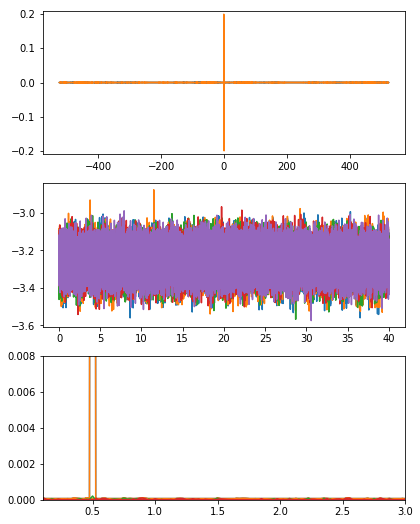

In [60]:
fig=plt.figure(figsize=(6.5,9))
ax1 = fig.add_subplot(311)
# ax1.plot(t[:,1],V[:,1],t[:,0],J[:,0])
ax1.plot(freq,Vfft.real,freq,Vfft2.real)
#ax1.set_xlim(-3,3)
ax1.set_ylim(-.21,.21)

if Xrayraw==True:   
    ax2=fig.add_subplot(312)
    ax2.plot(t,Io,t,If,t,Ir)
else:
    ax2=fig.add_subplot(312)
    ax2.plot(t,Ir)

ax3=fig.add_subplot(313)
ax3.plot(freq,np.abs(Vfft),freq,np.abs(Vfft2),freq,Vfft.real,freq,Vfft2.real)
ax3.set_xlim(0.1,3)
ax3.set_ylim(0,.008)
plt.show()

In [37]:
np.size(freq)

39900

In [384]:
print(freq[120],V[525,1],np.abs(Vfft[120]))
abs(Vfft[120])/V[525,1]

0.5000005000005001 0.1592814435 0.04186600690340944


0.2628429651531218

In [162]:
print(dt,np.sqrt(dt),dt*V[:,0].size)

0.00095238 0.030860654562079527 39.99996


In [171]:
np.sqrt(V[:,0].size)

204.93901531919198

In [205]:
freq[int(V[:,0].size/2)-1]

524.996020491516

In [202]:
V[:,0].size/2

116550.0

In [207]:
1/(2*dt)

525.000525000525

In [248]:
t[-1]

array([221.99882562, 221.99882562, 221.99882562, 221.99882562,
       221.99882562])

In [263]:
filestr=str(P + ' ' + str('%.3f'%float(1)) + ' '+ "*.txt")
#Making array of strings to help pandas find all data files
# for a single measured amplitude and location (point)
all_files=glob.glob(os.path.join(path,P, filestr))
all_files
len(all_files)

121

In [284]:
np.sqrt(V[:,0].size)/2

250.99800796022265

In [287]:
%%timeit [-n]
Vfft=np.fft.fft(V[:,1])/(V[:,0].size/2)

12 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [381]:
%%timeit [-n]
Vfft=np.fft.fft(Ir[:,0])/ns

15.1 ms ± 4.57 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [289]:
ns=V[:,0].size/2

In [347]:
Vfft.size
print(Vfft[-120].imag,Vfft[120].imag,np.shape(Vfft))

0.1594757843185224 -0.1594757843185224 (252000,)


In [370]:
Vfft_fi=np.zeros((1,Vfft.size))
Vfft_fi=Vfft_fi+1j*Vfft_fi
Vfft_fi[0,-120]=np.complex(Vfft[-120].real,Vfft[-120].imag)
Vfft_fi[0,120]=np.complex(Vfft[120].real,Vfft[120].imag)
Vfft_fi[0,120]

(0.00081105666507623-0.1594757843185224j)

In [372]:
Vifft=np.fft.ifft(Vfft_fi)*ns
Vifft.resize(V[:,0].size)


print(np.shape(Vifft),np.shape(V[:,0]))

(252000,) (252000,)


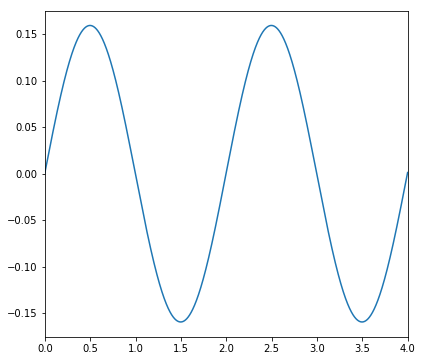

In [380]:
fig=plt.figure(figsize=(6.5,6))
ax1 = fig.add_subplot(111)
ax1.plot(t[:,1],Vifft)
ax1.set_xlim(0,4)

plt.show()

In [119]:
all_files=glob.glob(os.path.join(path,P, filestr))
data3=pd.concat((pd.read_csv(f,delimiter='\t') for f in all_files[initfile:finfile]),axis=1)
print(data3.shape)

(2100, 10)


In [120]:
print(data3.shape)
datadum=np.array(data3)

(2100, 10)


In [115]:

print(type(data))
datadum.resize(5,21000)
datadum

<class 'pandas.core.frame.DataFrame'>


array([[0.        , 0.0047619 , 0.0095238 , ..., 0.        , 0.        ,
        0.        ],
       [0.00095238, 0.00571428, 0.01047618, ..., 0.        , 0.        ,
        0.        ],
       [0.00190476, 0.00666666, 0.01142856, ..., 0.        , 0.        ,
        0.        ],
       [0.00285714, 0.00761904, 0.01238094, ..., 0.        , 0.        ,
        0.        ],
       [0.00380952, 0.00857142, 0.01333332, ..., 0.        , 0.        ,
        0.        ]])

In [129]:
print(datadum.reshape((5,4200),order="C")[0:10,0], datadum[2090:2105,5])

[0.        0.3999996 0.7999992 1.1999988 1.5999984] [1.9904742  1.99142658 1.99237896 1.99333134 1.99428372 1.9952361
 1.99618848 1.99714086 1.99809324 1.99904562]


In [74]:
np.shape(datadum)

(50, 2100)

In [111]:
data3

,0,1,2,3,4,5,6,7,8,9,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
3623309474.7705244000,0.000000,0.000952,0.001905,0.002857,0.003810,0.004762,0.005714,0.006667,0.007619,0.008571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency,-0.401468,-0.417904,-0.423153,-0.440338,-0.440901,-0.435151,-0.438151,-0.431277,-0.439088,-0.454336,...,-0.441588,-0.447462,-0.454899,-0.457399,-0.450337,-0.446900,-0.440026,-0.441276,-0.447462,-0.451399
0.500001,1.330313,1.367109,1.392847,1.514667,1.426832,1.423895,1.411776,1.441138,1.366172,1.503422,...,1.412276,1.440013,1.495113,1.491740,1.476621,1.453132,1.444199,1.395908,1.474310,1.427644
Amplitude,-0.008987,-0.020176,-0.003298,0.005266,0.008829,0.014205,0.008079,0.014268,0.009704,0.019956,...,0.017268,0.000953,0.018519,0.011892,0.006579,0.002078,0.007766,0.013955,0.007892,-0.002235
0.200000,-0.008095,-0.020215,-0.002472,0.001714,0.002651,0.003963,-0.000847,0.007775,0.005026,0.009524,...,-0.004346,-0.002159,0.001152,-0.003346,-0.003971,-0.006220,-0.004971,-0.000972,-0.005596,-0.018966
3623309476.7705224000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.990474,1.991427,1.992379,1.993331,1.994284,1.995236,1.996188,1.997141,1.998093,1.999046
